# NASA Data Analysis

## 1. Data Structure Analysis

In [1]:
import scipy.io
import pandas as pd
root = '/home/di0002ya/ESS/data/NASA/'

In [2]:
def save2df(root,name):
    temp= pd.read_csv(root+ name)
    return temp

In [3]:
B5Charge = save2df(root,'B0005_Charge.csv')

In [4]:
B5Discharge = save2df(root,'B0005_Discharge.csv')

In [5]:
B5Imp = save2df(root,'B0005_Impedance.csv')

In [6]:
B5Imp_Rec = save2df(root,'B0005_Rec_Impedance.csv')

## 2. Data Preprocessing

In [7]:
import numpy as np
def data_pre(df):
    x1 = np.arange(df.shape[0])
    # Convert Time_root to cycle 
    unique_ar = np.unique(df[['Time_root']])
    cycle_index = np.arange(unique_ar.shape[0])
    zipbObj = zip(unique_ar, cycle_index)
    dictOfWords = dict(zipbObj)
    df['Cycle'] = df['Time_root'].map(dictOfWords)
    return df 

In [8]:
B5Charge = data_pre(B5Charge)
B5Discharge = data_pre(B5Discharge)
B5Imp = data_pre(B5Imp)
B5Imp_Rec = data_pre(B5Imp_Rec)

## 3. Data Visulaization Based On Cycle & Inflection Points - Discharge

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def plot_cycle_feature(df, select, cycle_list): 
    filter_ls = []
    pts_ls = []
    for i in range(len(cycle_list)):
        cycle = cycle_list[i]
        filter_rows = df.loc[df['Cycle'] == cycle]
        filter_col = filter_rows[select]
        pts = filter_col.shape[0]
        filter_ls.append(filter_col)
        pts_ls.append(pts)    
        
    #Get PTS_LS Max Index 
    index = pts_ls.index(max(pts_ls))
    t = np.arange(pts_ls[index])

    #Append Filter Cols 
    for i in range(len(cycle_list)):
        filter_col = filter_ls[i]
        remain = pts_ls[index]-pts_ls[i]
        filter_ls[i] = filter_col.append(pd.Series(np.zeros(remain)))

    for i in range(len(cycle_list)):
        plt.plot(t,filter_ls[i])
    plt.xlabel('Pts per cycle')
    plt.ylabel('Value')
    plt.legend([str(cycle) for cycle in cycle_list],loc = 'upper left')
    plt.title(str(select))
    plt.show()
    return filter_ls
    

In [11]:
def plot_diff1_diff2(df,select,df_name, cycle_list,i, N):
    cycle = cycle_list[i]
    filter_rows = df.loc[df['Cycle'] == cycle]
    filter_col = filter_rows[select]
    dx = np.gradient(np.array(filter_col))
    ddx = np.gradient(dx)
    t = np.arange(ddx.shape[0])
    plt.plot(t,dx)
    plt.xlabel('Pts per cycle')
    plt.ylabel('Value')
    plt.title(df_name + '_'+ str(select)+': 1st order differntial')
    plt.show()
    t = np.arange(ddx.shape[0])
    plt.plot(t,ddx)
    plt.xlabel('Pts per cycle')
    plt.ylabel('Value')
    plt.title(df_name +'_'+ str(select)+': 2nd order differntial')
    plt.show()
    index1 = np.unravel_index(np.argmax(dx, axis=None), ddx.shape)[0]
    index2 = np.unravel_index(np.argmax(ddx, axis=None), ddx.shape)[0]

    max_ls1 = np.argsort(dx)[-N:][::-1]
    min_ls1 = np.argsort(dx)[:N]
    max_ls2 = np.argsort(ddx)[-N:][::-1]
    min_ls2 = np.argsort(ddx)[:N]

    return max_ls1, min_ls1, max_ls2, min_ls2
    
def plot_inflection_pts(df, select, cycle_list): 
    index_ls1 = []
    value_ls1 = []
    index_ls2 = []
    value_ls2 = []
    for i in range(len(cycle_list)):
        cycle = cycle_list[i]
        # Filter Col
        filter_rows = df.loc[df['Cycle'] == cycle]
        filter_col = filter_rows[select]
        pts = filter_col.shape[0]
        # X
        t = np.arange(pts)
        # Df
        dx = np.gradient(np.array(filter_col))
        # DDf
        ddx = np.gradient(dx)

        index1 = np.unravel_index(np.argmax(dx, axis=None), dx.shape)[0]
        value_ls1.append(np.array(filter_col)[index1])
        index_ls1.append(index1)
        
        index2 = np.unravel_index(np.argmax(ddx, axis=None), ddx.shape)[0]
        value_ls2.append(np.array(filter_col)[index2])
        index_ls2.append(index2)
        
    t = np.arange(len(cycle_list))
    index_ar1 = np.array(index_ls1)
    plt.plot(t,index_ar1)
    plt.xlabel('Cycle')
    plt.ylabel('Inflection Index Per Cycle')
    plt.title(str(select)+': 1st order Inflection Points vs Cycle')
    plt.show()

    value_ar1 = np.array(value_ls1)
    plt.plot(t,value_ar1)    
    plt.xlabel('Cycle')
    plt.ylabel('Inflection Value Per Cycle')
    plt.title(str(select)+': 1st order Inflection Values vs Cycle')
    plt.show()

    index_ar2 = np.array(index_ls2)
    plt.plot(t,index_ar2)
    plt.xlabel('Cycle')
    plt.ylabel('Inflection Index Per Cycle')
    plt.title(str(select)+': 2nd order Inflection Points vs Cycle')
    plt.show()

    value_ar2 = np.array(value_ls2)
    plt.plot(t,value_ar2) 
    plt.xlabel('Cycle')
    plt.ylabel('Inflection Value Per Cycle')
    plt.title(str(select)+': 2nd order Inflection Values vs Cycle')
    plt.show()
    return index_ls1, index_ls2

### 3.1 Discharge Voltage Measured

In [12]:
df = B5Discharge
cycle_ar = np.arange(0,160,1)
cycle_list = cycle_ar.tolist()
select = 'Voltage_measured'

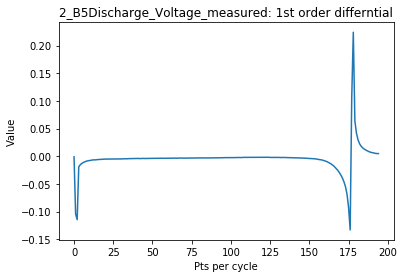

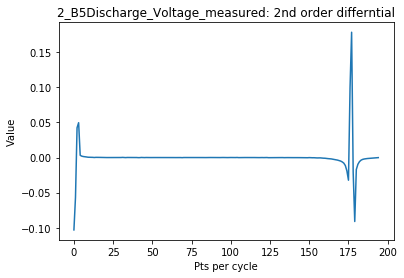

1st order top N Max [178 177]
2nd order top N Max [177 176]
1st order top N Min [176   2]
2nd order top N Min [  0 179]


In [13]:
cycle_no = 2 
max_ls1, min_ls1, max_ls2, min_ls2 = plot_diff1_diff2(df,select,str(cycle_no)+'_B5Discharge',cycle_list,cycle_no,2)
print('1st order top N Max', max_ls1)
print('2nd order top N Max', max_ls2)
print('1st order top N Min', min_ls1)
print('2nd order top N Min', min_ls2)

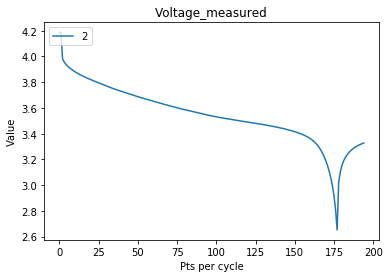

Max inflection point:  [0 1]
Min inflection point:  [177 176]


In [28]:
filter_ls = plot_cycle_feature(df, select, [2])
N = 2
max_ls1 = np.argsort(np.array(filter_ls[0]))[-N:][::-1]
min_ls1 = np.argsort(np.array(filter_ls[0]))[:N]
print('Max inflection point: ',max_ls1)
print('Min inflection point: ',min_ls1)

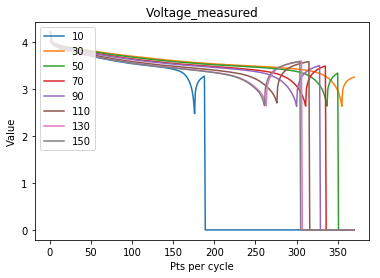

In [35]:
filter_ls = plot_cycle_feature(df, select, cycle_list[10:160:20])

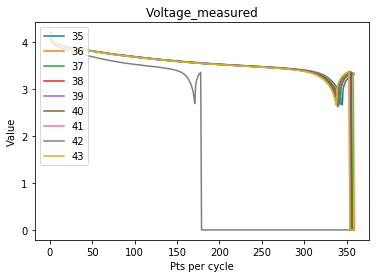

In [37]:
filter_ls = plot_cycle_feature(df, select, cycle_list[35:44])

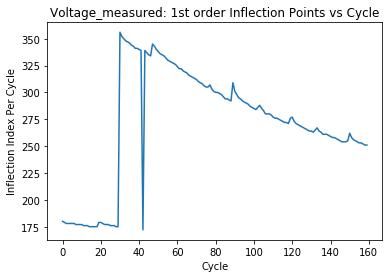

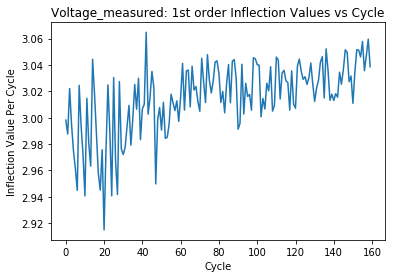

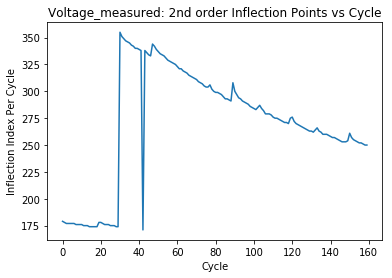

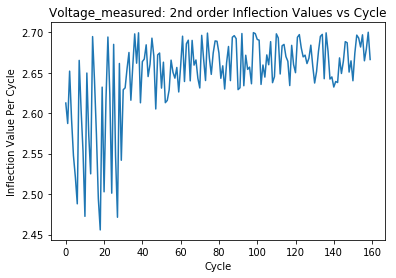

In [36]:
# For all cycles 
index_ls1, index_ls2 = plot_inflection_pts(df, select, cycle_list)

### 3.2 Discharge Current Measured

In [14]:
df = B5Discharge
cycle_ar = np.arange(0,160,1)
cycle_list = cycle_ar.tolist()
select = 'Current_measured'

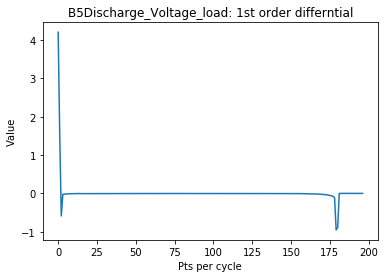

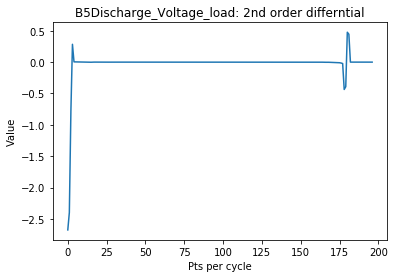

1st order top N Max [  0   1 183 187]
2nd order top N Max [180 181   3   4]
1st order top N Min [179 180   2 178]
2nd order top N Min [  0   1   2 178]


In [26]:
max_ls1, min_ls1, max_ls2, min_ls2 = plot_diff1_diff2(df,select,'B5Discharge',cycle_list,0,4)
print('1st order top N Max', max_ls1)
print('2nd order top N Max', max_ls2)
print('1st order top N Min', min_ls1)
print('2nd order top N Min', min_ls2)

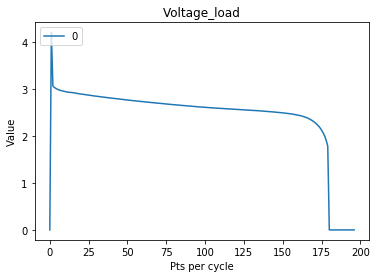

Max inflection point:  [1 2 3 4 5]
Min inflection point:  [  0 194 193 192 191]


In [27]:
filter_ls = plot_cycle_feature(df, select, [0])
N = 5
max_ls1 = np.argsort(np.array(filter_ls[0]))[-N:][::-1]
min_ls1 = np.argsort(np.array(filter_ls[0]))[:N]
print('Max inflection point: ',max_ls1)
print('Min inflection point: ',min_ls1)

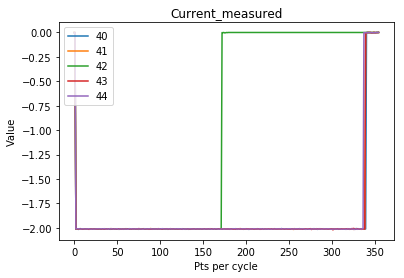

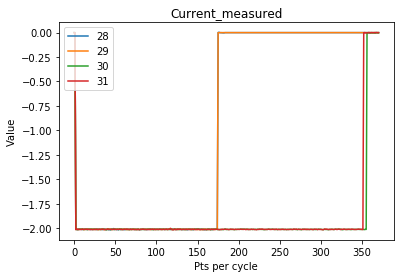

In [42]:
filter_ls = plot_cycle_feature(df, select, cycle_list[40:45])
filter_ls = plot_cycle_feature(df, select, cycle_list[28:32])

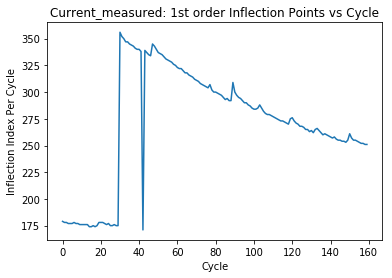

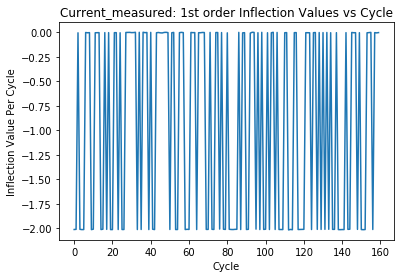

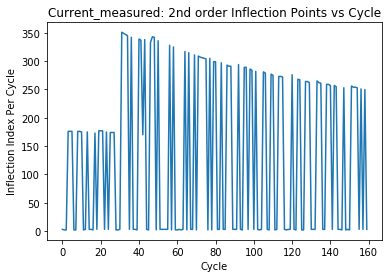

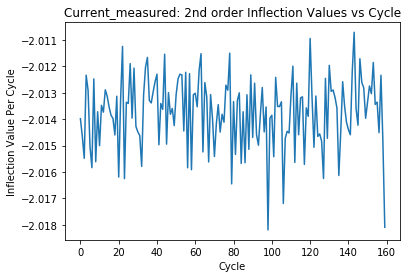

In [43]:
# For all cycles 
index_ls1, index_ls2 = plot_inflection_pts(df, select, cycle_list)

### 3.3 Capacity 

In [44]:
df = B5Discharge
cycle_ar = np.arange(0,160,1)
cycle_list = cycle_ar.tolist()
select = 'Capacity'

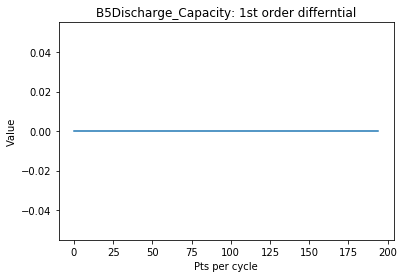

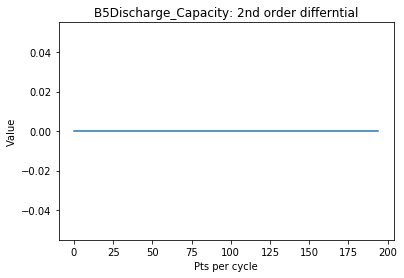

1st order top N Max [194  48  70  69]
2nd order top N Max [194  48  70  69]
1st order top N Min [  0 124 125 126]
2nd order top N Min [  0 124 125 126]


In [45]:
max_ls1, min_ls1, max_ls2, min_ls2 = plot_diff1_diff2(df,select,'B5Discharge',cycle_list,2,4)
print('1st order top N Max', max_ls1)
print('2nd order top N Max', max_ls2)
print('1st order top N Min', min_ls1)
print('2nd order top N Min', min_ls2)

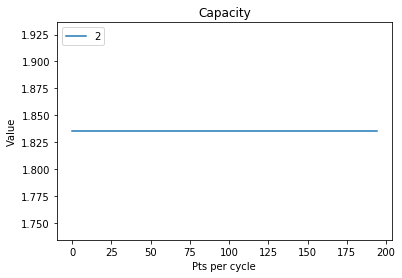

Max inflection point:  [194  48]
Min inflection point:  [  0 124]


In [46]:
filter_ls = plot_cycle_feature(df, select, [2])
N = 2
max_ls1 = np.argsort(np.array(filter_ls[0]))[-N:][::-1]
min_ls1 = np.argsort(np.array(filter_ls[0]))[:N]
print('Max inflection point: ',max_ls1)
print('Min inflection point: ',min_ls1)

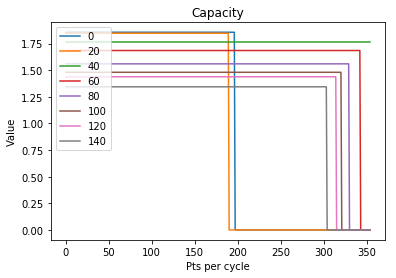

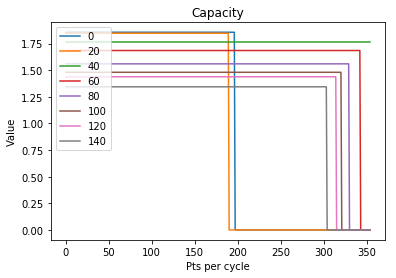

In [47]:
filter_ls = plot_cycle_feature(df, select, cycle_list[0:160:20])
filter_ls = plot_cycle_feature(df, select, cycle_list[0:160:20])

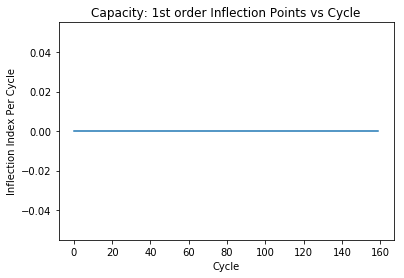

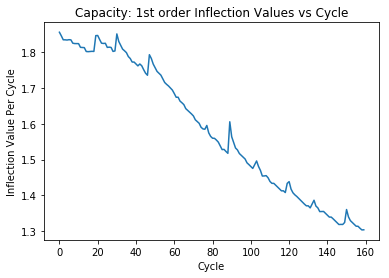

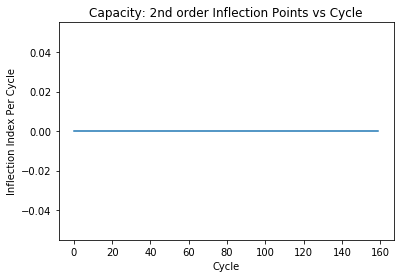

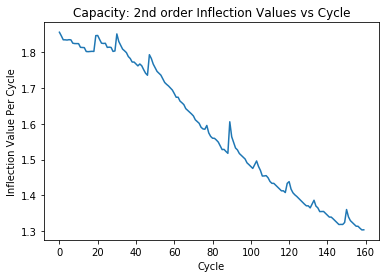

In [48]:
# For all cycles 
index_ls1, index_ls2 = plot_inflection_pts(df, select, cycle_list)

### 3.4 Current Load

In [18]:
df = B5Discharge
cycle_ar = np.arange(0,160,1)
cycle_list = cycle_ar.tolist()
select = 'Current_load'

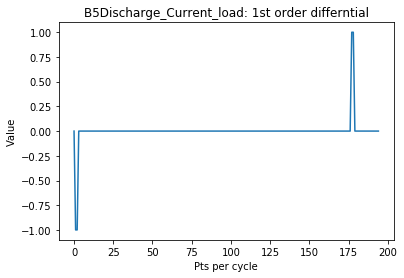

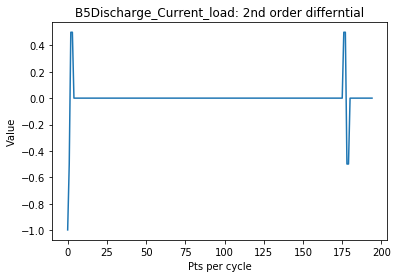

1st order top N Max [177 178 179 187]
2nd order top N Max [177   2   3 176]
1st order top N Min [  1   2 189 181]
2nd order top N Min [  0   1 179 178]


In [19]:
max_ls1, min_ls1, max_ls2, min_ls2 = plot_diff1_diff2(df,select,'B5Discharge',cycle_list,2,4)
print('1st order top N Max', max_ls1)
print('2nd order top N Max', max_ls2)
print('1st order top N Min', min_ls1)
print('2nd order top N Min', min_ls2)

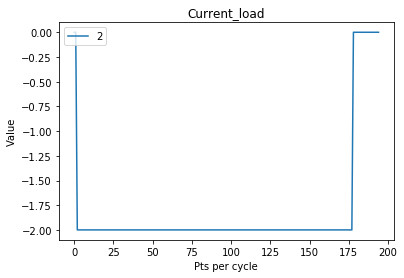

Max inflection point:  [188 180 194 183]
Min inflection point:  [117 122 143 106]


In [21]:
filter_ls = plot_cycle_feature(df, select, [2])
N = 4
max_ls1 = np.argsort(np.array(filter_ls[0]))[-N:][::-1]
min_ls1 = np.argsort(np.array(filter_ls[0]))[:N]
print('Max inflection point: ',max_ls1)
print('Min inflection point: ',min_ls1)

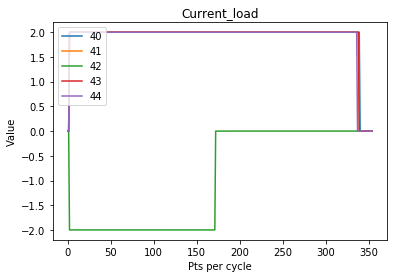

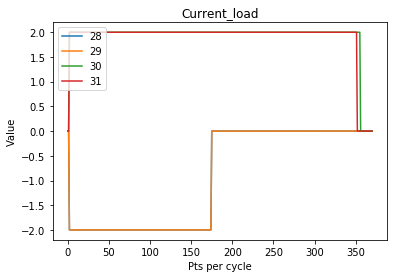

In [52]:
filter_ls = plot_cycle_feature(df, select, cycle_list[40:45])
filter_ls = plot_cycle_feature(df, select, cycle_list[28:32])

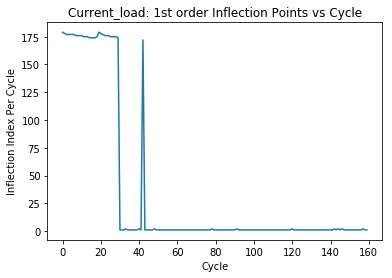

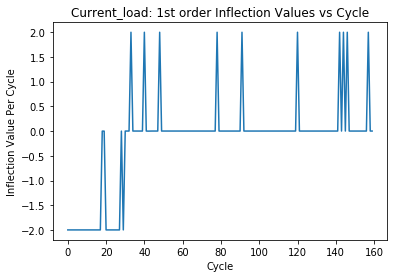

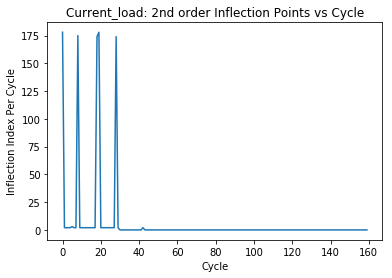

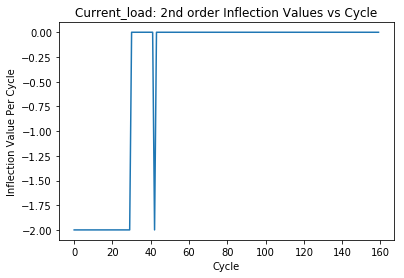

In [53]:
# For all cycles 
index_ls1, index_ls2 = plot_inflection_pts(df, select, cycle_list)

### 3.4 Voltage Load

In [22]:
df = B5Discharge
cycle_ar = np.arange(0,160,1)
cycle_list = cycle_ar.tolist()
select = 'Voltage_load'

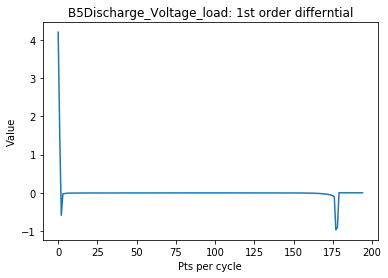

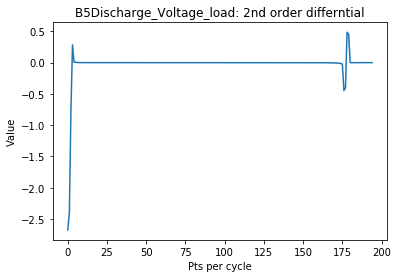

1st order top N Max [  0   1 190 179]
2nd order top N Max [178 179   3   4]
1st order top N Min [177 178   2 176]
2nd order top N Min [  0   1   2 176]


In [23]:
max_ls1, min_ls1, max_ls2, min_ls2 = plot_diff1_diff2(df,select,'B5Discharge',cycle_list,2,4)
print('1st order top N Max', max_ls1)
print('2nd order top N Max', max_ls2)
print('1st order top N Min', min_ls1)
print('2nd order top N Min', min_ls2)

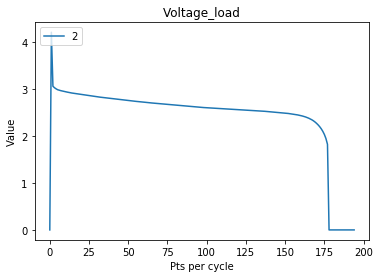

Max inflection point:  [1 2]
Min inflection point:  [  0 192]


In [24]:
filter_ls = plot_cycle_feature(df, select, [2])
N = 2
max_ls1 = np.argsort(np.array(filter_ls[0]))[-N:][::-1]
min_ls1 = np.argsort(np.array(filter_ls[0]))[:N]
print('Max inflection point: ',max_ls1)
print('Min inflection point: ',min_ls1)

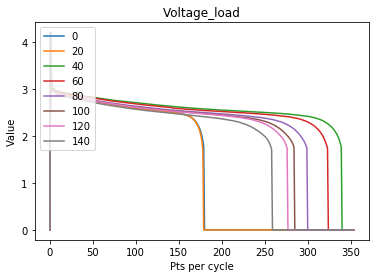

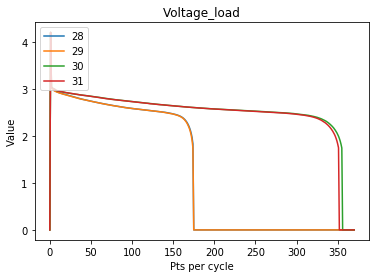

In [25]:
filter_ls = plot_cycle_feature(df, select, cycle_list[0:160:20])
filter_ls = plot_cycle_feature(df, select, cycle_list[28:32])

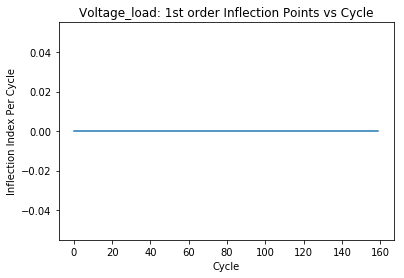

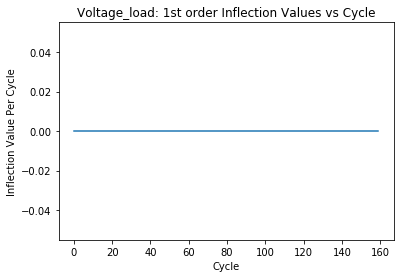

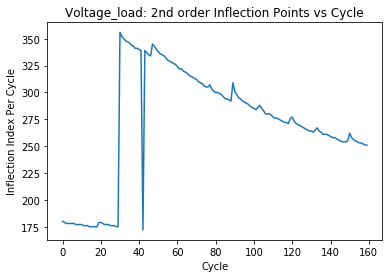

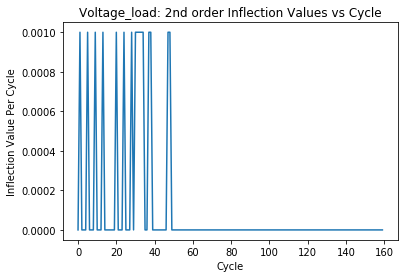

In [59]:
# For all cycles 
index_ls1, index_ls2 = plot_inflection_pts(df, select, cycle_list)

## 3. Data Visulaization Based On Cycle & Inflection Points - Charge

### 3.1 Voltage Measured

In [60]:
df = B5Charge
cycle_ar = np.arange(0,160,1)
cycle_list = cycle_ar.tolist()
select = 'Voltage_measured'

In [61]:
df.head(2)

,Temperature_root,Time_root,Time,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Cycle
0,24,733500.54743,0.000,3.873017,-0.001201,24.655358,0.000,0.003,0
1,24,733500.54743,2.532,3.479394,-4.030268,24.666480,-4.036,1.570,0


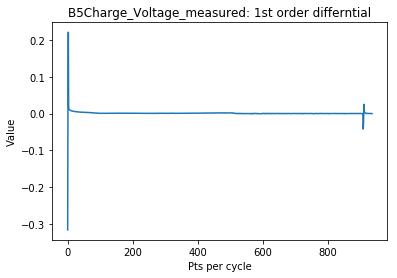

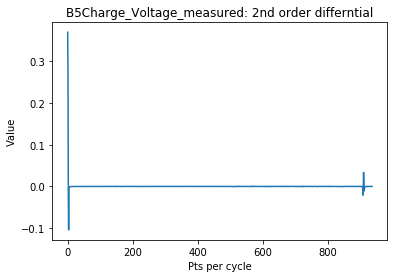

1st order top N Max [2 1]
2nd order top N Max [0 1]
1st order top N Min [  0 909]
2nd order top N Min [  3 908]


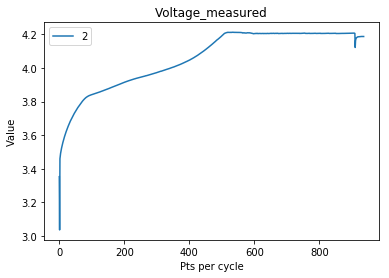

Max inflection point:  [532 534]
Min inflection point:  [1 0]


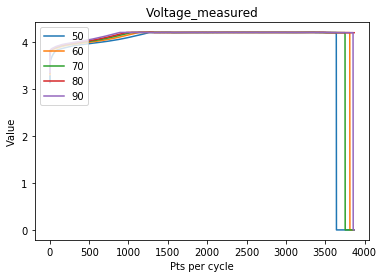

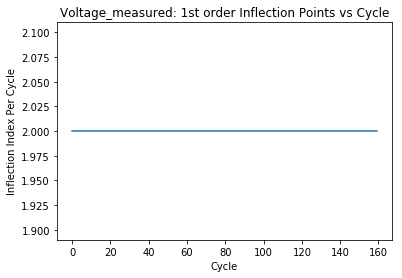

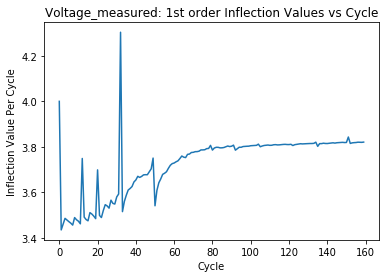

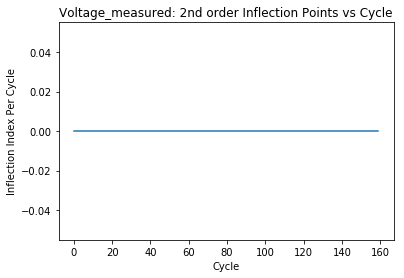

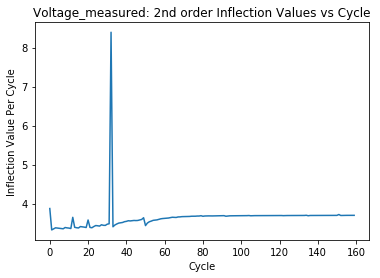

In [65]:
max_ls1, min_ls1, max_ls2, min_ls2 = plot_diff1_diff2(df,select,'B5Charge',cycle_list,2,2)
print('1st order top N Max', max_ls1)
print('2nd order top N Max', max_ls2)
print('1st order top N Min', min_ls1)
print('2nd order top N Min', min_ls2)
filter_ls = plot_cycle_feature(df, select, [2])
N = 2
max_ls1 = np.argsort(np.array(filter_ls[0]))[-N:][::-1]
min_ls1 = np.argsort(np.array(filter_ls[0]))[:N]
print('Max inflection point: ',max_ls1)
print('Min inflection point: ',min_ls1)
filter_ls = plot_cycle_feature(df, select, cycle_list[50:100:10])
# For all cycles 
index_ls1, index_ls2 = plot_inflection_pts(df, select, cycle_list)

### 3.2 Current Measured

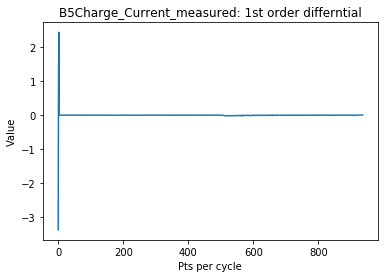

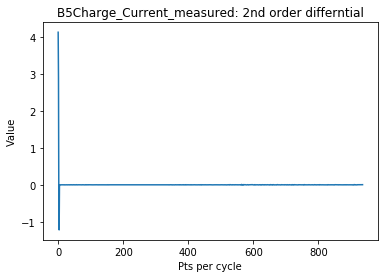

1st order top N Max [2 1]
2nd order top N Max [0 1]
1st order top N Min [  0 520]
2nd order top N Min [3 2]


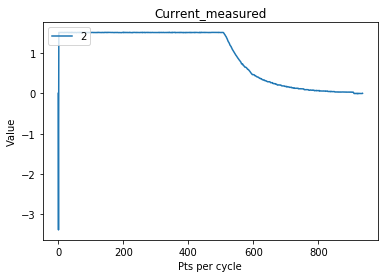

Max inflection point:  [341 144]
Min inflection point:  [  1 920]


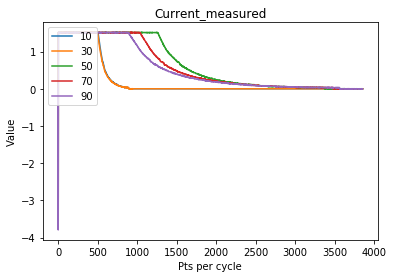

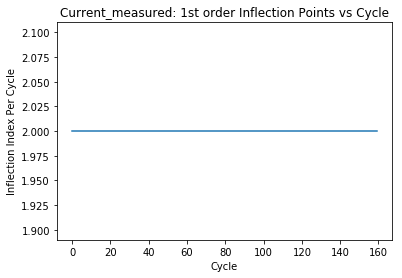

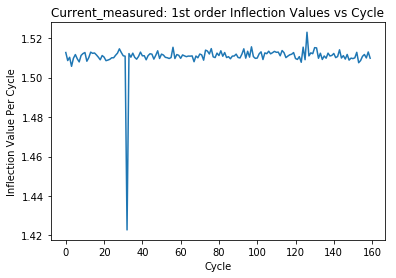

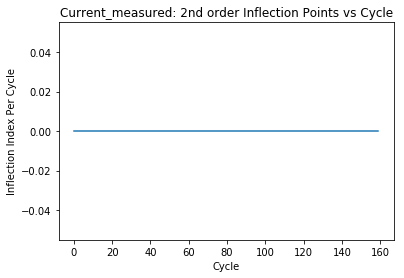

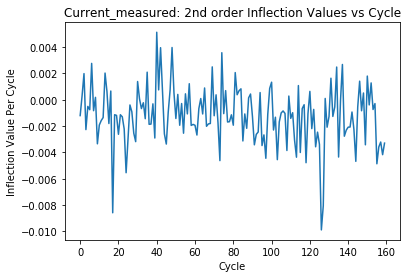

In [66]:
select = 'Current_measured'
max_ls1, min_ls1, max_ls2, min_ls2 = plot_diff1_diff2(df,select,'B5Charge',cycle_list,2,2)
print('1st order top N Max', max_ls1)
print('2nd order top N Max', max_ls2)
print('1st order top N Min', min_ls1)
print('2nd order top N Min', min_ls2)
filter_ls = plot_cycle_feature(df, select, [2])
N = 2
max_ls1 = np.argsort(np.array(filter_ls[0]))[-N:][::-1]
min_ls1 = np.argsort(np.array(filter_ls[0]))[:N]
print('Max inflection point: ',max_ls1)
print('Min inflection point: ',min_ls1)
filter_ls = plot_cycle_feature(df, select, cycle_list[10:100:20])
# For all cycles 
index_ls1, index_ls2 = plot_inflection_pts(df, select, cycle_list)

### 3.3 Voltage Charge

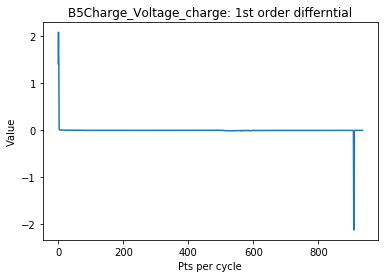

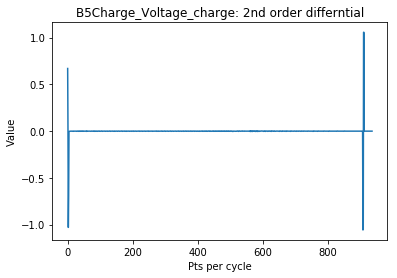

1st order top N Max [1 0]
2nd order top N Max [910 911]
1st order top N Min [909 910]
2nd order top N Min [908 909]


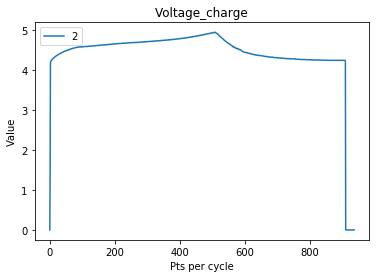

Max inflection point:  [508 507]
Min inflection point:  [  0 911]


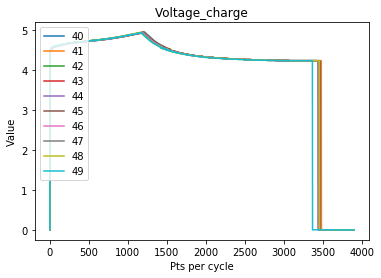

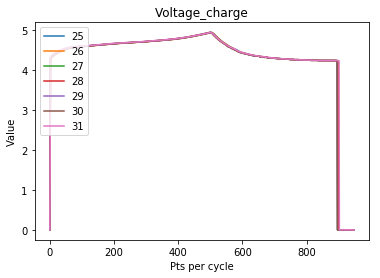

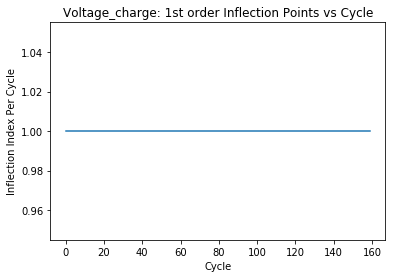

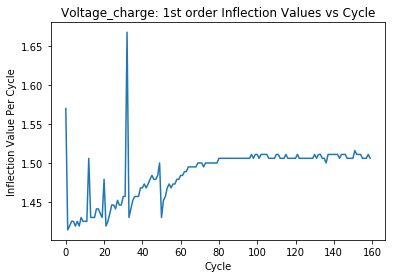

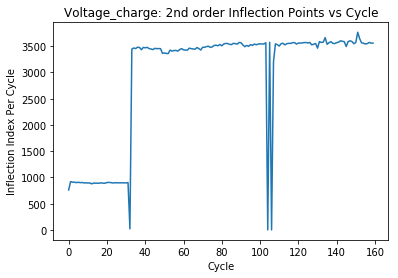

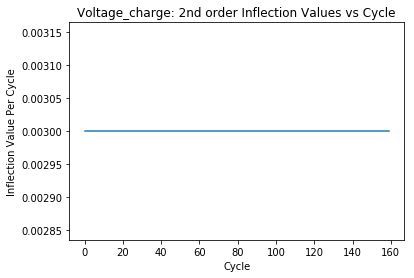

In [67]:
select = 'Voltage_charge'
max_ls1, min_ls1, max_ls2, min_ls2 = plot_diff1_diff2(df,select,'B5Charge',cycle_list,2,2)
print('1st order top N Max', max_ls1)
print('2nd order top N Max', max_ls2)
print('1st order top N Min', min_ls1)
print('2nd order top N Min', min_ls2)
filter_ls = plot_cycle_feature(df, select, [2])
N = 2
max_ls1 = np.argsort(np.array(filter_ls[0]))[-N:][::-1]
min_ls1 = np.argsort(np.array(filter_ls[0]))[:N]
print('Max inflection point: ',max_ls1)
print('Min inflection point: ',min_ls1)
filter_ls = plot_cycle_feature(df, select, cycle_list[40:50])
filter_ls = plot_cycle_feature(df, select, cycle_list[25:32])
# For all cycles 
index_ls1, index_ls2 = plot_inflection_pts(df, select, cycle_list)

### 3.4 Current Charge

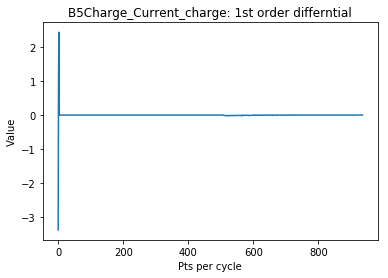

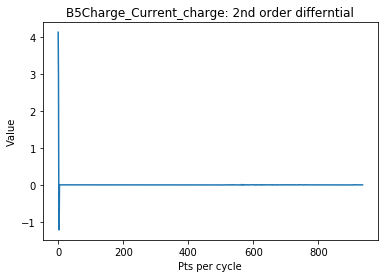

1st order top N Max [2 1]
2nd order top N Max [0 1]
1st order top N Min [  0 520]
2nd order top N Min [3 2]


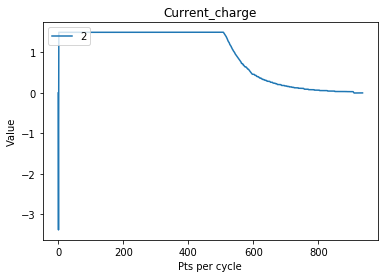

Max inflection point:  [482 298]
Min inflection point:  [  1 911]


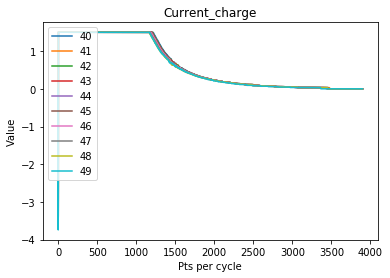

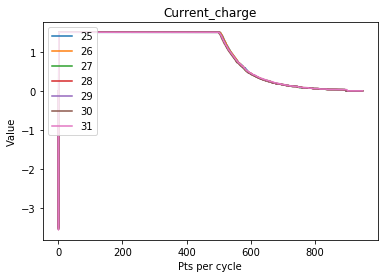

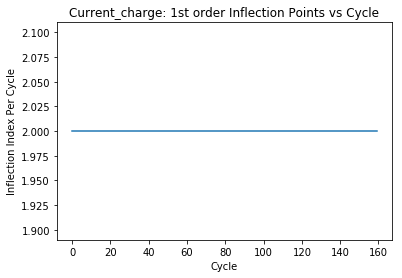

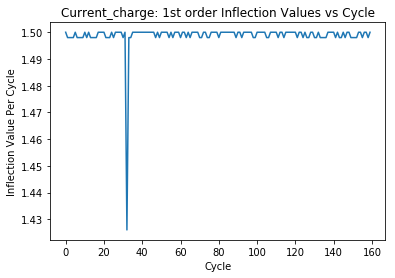

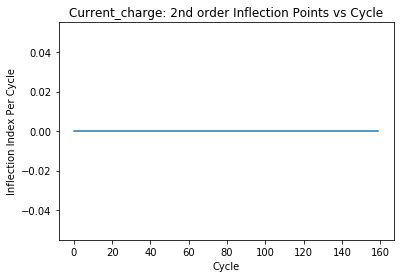

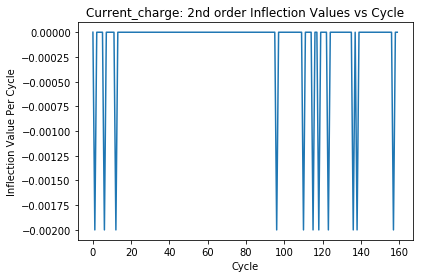

In [68]:
select = 'Current_charge'
max_ls1, min_ls1, max_ls2, min_ls2 = plot_diff1_diff2(df,select,'B5Charge',cycle_list,2,2)
print('1st order top N Max', max_ls1)
print('2nd order top N Max', max_ls2)
print('1st order top N Min', min_ls1)
print('2nd order top N Min', min_ls2)
filter_ls = plot_cycle_feature(df, select, [2])
N = 2
max_ls1 = np.argsort(np.array(filter_ls[0]))[-N:][::-1]
min_ls1 = np.argsort(np.array(filter_ls[0]))[:N]
print('Max inflection point: ',max_ls1)
print('Min inflection point: ',min_ls1)
filter_ls = plot_cycle_feature(df, select, cycle_list[40:50])
filter_ls = plot_cycle_feature(df, select, cycle_list[25:32])
# For all cycles 
index_ls1, index_ls2 = plot_inflection_pts(df, select, cycle_list)